# What to expect

In notebook 2A (and 2B for your dataset) we:

- Had a look at the mapping results
- Combined reads per gene from all the samples in our experiment into a master dataframe and stored it as "analysis/Schistosoma_mansoni/star/ReadsPerGene.csv"
- Normalised the reads using PyDESeq2
- Visualised our results in a PCA plot

In this session, we will complete the analysis to find out which genes are differentially expressed. We will do this first for the example dataset <i>Schistosoma mansoni</i>, and then in notebook 3B you will repeat the process for your chosen dataset. 

For your dataset, you will also look at the GO terms and metabolic pathways associated with your differentially expressed genes.

# Set up
First, we need to import the required libraries and install pydeseq2 again

In [1]:
# import required libraries
import pandas as pd

#Install PyDESeq2 and import required classes
! pip install --quiet pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

We now need to create the dds object again, as we will use it for the next steps of the analysis.

As you might remember from workshop 2A, the <i>Schistosoma mansoni</i> dataset had samples from four different stages: 3 hr schistosomulum, 24 hr schistosomulum, cercarium and platyhelminth adult. We want to focus on comparing cercarium and 24hr schistosomulum.

<div class="alert alert-block alert-warning">
    
Create the counts and the metadata tables and restrict them so that they only contain the conditions we want to compare.

In [2]:
# load the counts and metadata again - remember that we have to transpose the ReadsPerGene table to use it in PyDESeq2
counts = pd.read_csv("analysis/Schistosoma_mansoni/star/ReadsPerGene.csv", index_col=0).T
metadata = pd.read_csv("data/Schistosoma_mansoni/metadata.csv", index_col=0)

# restrict to the 2 stages we want to compare
counts_s = counts[metadata["stage"].isin(["cercarium","24 hr schistosomulum"])]
metadata_s = metadata[metadata["stage"].isin(["cercarium","24 hr schistosomulum"])]

Now that we have the counts and metadata, we can create the deseq2 dataset object again

In [3]:
# create DESeq2 dataset object
dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    design="stage",  # compare samples based on the developmental "stage"
    refit_cooks=True
)

# Differential Expression analysis

As we did in notebook 2A, we will apply the `deseq2` method to our dds object. Remember that this method normalises the data, estimates the dispersion and calculates the log fold change (LFC) based on the design factor.

In [4]:
# Run DESeq2
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.80 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 14.60 seconds.

Fitting LFCs...
... done in 7.34 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 0 outlier genes.



This time, however, we also want to perform a statistical analysis, to find out which differences in gene expression are statistically significant. To do that, we use the class `DeseqStats` on our dds object, and store the output in a new object called "stat_res"

In [5]:
stat_res=DeseqStats(dds, contrast=["stage", "24 hr schistosomulum", "cercarium"])

Note that in the command we have to specify what we want to use in our pairwise comparison (`contrast`) 

- `stage` : this indicates that we are comparing samples based on their developmental stages
- `24 hr schistosomulum` and `cercarium`: this indicates the two stages we want to compare. The order in which we write them is important. With the code above, fold change will be calculated as Gene counts in 24 hr schistosomulum divided by Gene counts in cercarium

Now, we have to generate a summary of the statistical analysis contained in the "stat_res" object. To do that, we use the `summary` method.

In [6]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: stage 24 hr schistosomulum vs cercarium
                      baseMean  log2FoldChange     lfcSE      stat  \
gene                                                                 
gene:Smp_000020    4894.181166       -0.220493  0.167242 -1.318412   
gene:Smp_000030   18780.967017       -0.640823  0.113347 -5.653632   
gene:Smp_000040    5663.668190        0.609067  0.135677  4.489107   
gene:Smp_000050    2824.491025        1.787653  0.281846  6.342663   
gene:Smp_000070    1794.569198       -0.465374  0.162826 -2.858100   
...                        ...             ...       ...       ...   
gene:Smp_900070   41334.608763       -2.999898  0.434565 -6.903219   
gene:Smp_900080    6394.476687       -3.246539  0.357623 -9.078104   
gene:Smp_900090  159155.732267       -4.304425  0.436382 -9.863897   
gene:Smp_900100    5753.668599       -1.824721  0.937269 -1.946848   
gene:Smp_900110  114952.325564       -3.702547  0.455893 -8.121532   

           

... done in 2.89 seconds.



Voila! This is the raw result of our differential expression analysis. We can find out more about the columns in these results on the [page for the DESeq2 gene-level differential expression workflow](https://master.bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#building-the-results-table) , as the python module we are using was developed from the DESeq2 tool. 

Let's take a moment to make sure we understand the results.

<div class="alert alert-block alert-warning">

Please discuss the following in your group:

- baseMean: what is this value? How is it calculated?
  
- log2FoldChange: what is this value? Why do you think the fold change is calculated as log2? What does a positive log2Foldchange mean?
  
- lfcSE: what is this value?

- stat: what is this value?

- pvalue and padj: what is the difference between these two values?

You can add some notes from your discussion on this text cell

\

\

\

We will now store the results in a dataframe called "res", so we can work with the results.

To do this, we will apply the PyDESeq2 attribute `results_df` to our stat_res object

In [7]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
gene:Smp_000020,4894.181166,-0.220493,0.167242,-1.318412,1.873657e-01,2.438307e-01
gene:Smp_000030,18780.967017,-0.640823,0.113347,-5.653632,1.570926e-08,4.778817e-08
gene:Smp_000040,5663.668190,0.609067,0.135677,4.489107,7.152248e-06,1.703273e-05
gene:Smp_000050,2824.491025,1.787653,0.281846,6.342663,2.258273e-10,8.001120e-10
gene:Smp_000070,1794.569198,-0.465374,0.162826,-2.858100,4.261862e-03,7.376211e-03
...,...,...,...,...,...,...
gene:Smp_900070,41334.608763,-2.999898,0.434565,-6.903219,5.083732e-12,2.035197e-11
gene:Smp_900080,6394.476687,-3.246539,0.357623,-9.078104,1.104821e-19,7.298235e-19
gene:Smp_900090,159155.732267,-4.304425,0.436382,-9.863897,5.968676e-23,4.747110e-22


<div class="alert alert-block alert-success">
<b>Learning outcomes</b>

You should now...

- Know how to perform differential expression analysis using PyDESeq2
- Understand the results produced by PyDESeq2

# Cleaning and exploring the results

There are a couple of things we should check in our results dataframe

<div class="alert alert-block alert-warning">

Use `describe()` to get an overview of the res dataframe. We practised this in notebook 1. 

In [8]:
#Add your code here
res.describe()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
count,9896.000000,9557.000000,9557.000000,9557.000000,9.552000e+03,9.552000e+03
mean,2715.604585,-0.080115,0.488734,-0.109984,1.467692e-01,1.652212e-01
std,14850.030730,1.901095,0.761218,6.591049,2.681766e-01,2.866992e-01
min,0.000000,-12.561855,0.067341,-41.006254,0.000000e+00,0.000000e+00
25%,95.233016,-0.968455,0.157063,-3.642742,5.384097e-12,2.152958e-11
50%,828.352827,-0.016190,0.222493,-0.060060,3.084213e-04,6.167778e-04
75%,2485.313509,0.918156,0.380387,3.577405,1.460512e-01,1.947281e-01
max,834912.545669,10.592024,3.879567,32.785460,9.996467e-01,9.996467e-01


 <div class="alert alert-block alert-warning">
     
Discuss in your groups whether there is anything that does not look right

<details>
<summary><i>Hints and tips</i></summary>
    
    Think about what each column means and you will realise that there are three values that do not make sense

</details>

You can add some notes from your discussion on this text cell

\

\

\

Let's fix the first problem

In [9]:
import numpy as np

# replace p-values of 0 with a very small number
res.loc[ res.pvalue == 0, "pvalue" ] = np.finfo(np.float64).tiny
res.loc[ res.padj == 0, "padj" ] = np.finfo(np.float64).tiny

In the code above:

- `.loc` is a pandas attribute used to access a group of rows and columns
- `res.pvalue == 0` is a boolean condition checking where the value in the column "pvalue" of the dataframe "res" is exactly zero
- `"pvalue"` indicates which column will be modified when the boolean condition is met. In other words, the code will target the "pvalue" column where its values are zero
- `np.finfo(np.float64)` finds the machine limits for the numpy data type float64 (decimal numbers)
- `.tiny` is an attribute of the limits obtained from np.finfo(np.float64) that provides the smallest positive float64 number that the system can handle

 <div class="alert alert-block alert-warning">
Let's check that it worked

In [10]:
# Check that it has worked
res.describe()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
count,9896.000000,9557.000000,9557.000000,9557.000000,9.552000e+03,9.552000e+03
mean,2715.604585,-0.080115,0.488734,-0.109984,1.467692e-01,1.652212e-01
std,14850.030730,1.901095,0.761218,6.591049,2.681766e-01,2.866992e-01
min,0.000000,-12.561855,0.067341,-41.006254,3.830098e-309,2.225074e-308
25%,95.233016,-0.968455,0.157063,-3.642742,5.384097e-12,2.152958e-11
50%,828.352827,-0.016190,0.222493,-0.060060,3.084213e-04,6.167778e-04
75%,2485.313509,0.918156,0.380387,3.577405,1.460512e-01,1.947281e-01
max,834912.545669,10.592024,3.879567,32.785460,9.996467e-01,9.996467e-01


Now that we got rid of the 0 values, let's save the dataframe in csv format in case we want to use it outside noteable

In [11]:
# save to csv file
res.to_csv(f"analysis/Schistosoma_mansoni/24h_schistosomulum_vs_cercarium.full.csv")

Let's fix the second problem. 
The results for a gene that is very lowly expressed will probably not be very reliable, or very informative of a biological function. They might also make further visualisation skewed. To avoid this, we will remove genes with very low expression. A common (although arbitrary) threshold for this is a baseMean of 10.

<div class="alert alert-block alert-warning">

Fill in the gaps in the code below to remove results with baseMean<10 from the res dataframe. You practised how to do this in DExB2 class 8. 

In [11]:
# Filter results with baseMean<10
res=res[res.baseMean>=10]
# Check that it has worked
res.describe()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
count,8555.000000,8555.000000,8555.000000,8555.000000,8.550000e+03,8.550000e+03
mean,3140.970321,-0.031544,0.267344,-0.099505,1.077164e-01,1.227130e-01
std,15929.821365,1.853996,0.196866,6.953278,2.315548e-01,2.494242e-01
min,10.002349,-12.561855,0.067341,-41.006254,3.830098e-309,2.225074e-308
25%,281.724561,-0.877620,0.152139,-4.213359,1.436604e-13,6.417592e-13
50%,1136.416598,0.004142,0.205032,0.026187,3.224143e-05,7.201450e-05
75%,2861.478723,0.911665,0.305476,4.117143,5.526633e-02,8.069767e-02
max,834912.545669,10.592024,3.254289,32.785460,9.996467e-01,9.996467e-01


Let's start exploring the results

<div class="alert alert-block alert-warning">

Find out and discuss in your group:

- How many genes are significantly differentially expressed?
- For how many of these significant genes is the fold change (FC) greater than 2 or less than 0.5? Store them in a new dataframe called "sigs", and save it as a csv file called "cercarium_vs_24h_schistosomulum.filtered"

In [12]:
#Find out how many genes are significantly differentially expressed
sum(res.padj<0.05)

6193

In [13]:
# Get a list of only those genes that have a fold change FC > 2 or FC < 0.5 and are significantly changed
sigs=res[(res.padj<0.05)&(abs(res.log2FoldChange)>1)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
gene:Smp_000050,2824.491025,1.787653,0.281846,6.342663,2.258273e-10,8.001120e-10
gene:Smp_000080,12.055362,1.996793,0.907493,2.200340,2.778281e-02,4.267268e-02
gene:Smp_000100,26042.364286,-2.741560,0.086596,-31.659222,5.661766e-220,5.408119e-217
gene:Smp_000150,5933.919227,-1.861954,0.238965,-7.791759,6.608295e-15,3.228769e-14
gene:Smp_000160,821.898894,3.572017,0.229253,15.581144,9.778826e-55,3.277451e-53
...,...,...,...,...,...,...
gene:Smp_900060,16889.104818,-2.434262,0.781077,-3.116543,1.829848e-03,3.336904e-03
gene:Smp_900070,41334.608763,-2.999898,0.434565,-6.903219,5.083732e-12,2.035197e-11
gene:Smp_900080,6394.476687,-3.246539,0.357623,-9.078104,1.104821e-19,7.298235e-19


In [15]:
# save it as a csv file
sigs.to_csv(f"analysis/Schistosoma_mansoni/24h_schistosomulum_vs_cercarium.filtered.csv")

<div class="alert alert-block alert-success">
<b>Learning outcomes</b>

You should now...

- Understand what to look for when cleaning differential expression analysis results
- Know how to explore and filter the results

# Visualisation

<figure>
    <img src="https://scienceparkstudygroup.github.io/rna-seq-lesson/img/volcano_plot.png" align="right" width="400">
</figure>

A common way to visualise differential expression analysis results is a volcano plot.
The advantage of this plot is that we can see at the same time the change in gene expression and the statistical significance of that change, for each gene. That makes it easy to identify genes for further analysis.
As shown in the figure on the right (taken from [this source](https://scienceparkstudygroup.github.io/rna-seq-lesson/06-differential-analysis/index.html#3-volcano-plot)), in a typical volvano plot:
* on the X axis we plot the log2 fold change in gene expression
* on the Y axis we plot the -log10 p-value. Why log10? 

    (a) The p-value is transformed into log10 to help with visualisation, in the same way that the fold change in gene expression was calculated as log2 by PyDESeq2. 

    (b) If you remember previous stats lessons, p-values are a probability, and therefore are always between 0 and 1. The log10 of a number between 0 and 1 will always be negative. To make interpretation easier, we do "-"log10, so the result is always a positive number. For example: log10(0.5)=-0.301 ; -[log10(0.5)]=-[-0.301]=0.301.

Let's plot our results in a volcano plot. To do that, we will use matplotlib, which we import as "plt"

You used matplotlib in DExB2, for example in classes 5 and 6. If you need a quick refresher, have a look [here](https://matplotlib.org/stable/users/explain/quick_start.html)

In [14]:
import matplotlib.pylab as plt

<div class="alert alert-block alert-warning">

Using matplotlib (plt), make a scatter plot that: 
* in the X axis plots the log2FoldChange values from the "res" dataframe 
* in the Y axis plots -log10 of the padj values from the "res" dataframe

In [15]:
# First, create a new column in the dataframe res that contains the -log10(padj)
res['-log10 padj']=-np.log10(res['padj'])
res

/tmp/ipykernel_736/3526454042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['-log10 padj']=-np.log10(res['padj'])


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10 padj
gene,,,,,,,
gene:Smp_000020,4894.181166,-0.220493,0.167242,-1.318412,1.873657e-01,2.438307e-01,0.612912
gene:Smp_000030,18780.967017,-0.640823,0.113347,-5.653632,1.570926e-08,4.778817e-08,7.320680
gene:Smp_000040,5663.668190,0.609067,0.135677,4.489107,7.152248e-06,1.703273e-05,4.768716
gene:Smp_000050,2824.491025,1.787653,0.281846,6.342663,2.258273e-10,8.001120e-10,9.096849
gene:Smp_000070,1794.569198,-0.465374,0.162826,-2.858100,4.261862e-03,7.376211e-03,2.132167
...,...,...,...,...,...,...,...
gene:Smp_900070,41334.608763,-2.999898,0.434565,-6.903219,5.083732e-12,2.035197e-11,10.691393
gene:Smp_900080,6394.476687,-3.246539,0.357623,-9.078104,1.104821e-19,7.298235e-19,18.136782
gene:Smp_900090,159155.732267,-4.304425,0.436382,-9.863897,5.968676e-23,4.747110e-22,21.323571


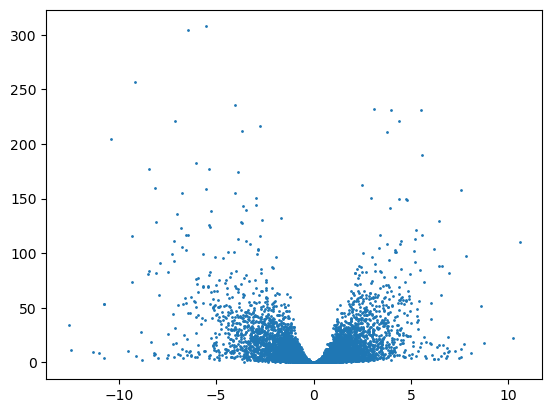

In [16]:
# Now, make the scatter plot using the code below
plt.scatter(x=res['log2FoldChange'],y=res['-log10 padj'], s=1)

Let's make the volcano plot fancier by colouring dots depending on:
* whether a gene is up- or downregulated -> We will consider that a gene is up- or downregulated if its expression level at least doubles or halves between the two conditions
* whether the change is significant -> We will use padj<0.05

<div class="alert alert-block alert-warning">

Fill in the code below to colour the dots in the volcano plot

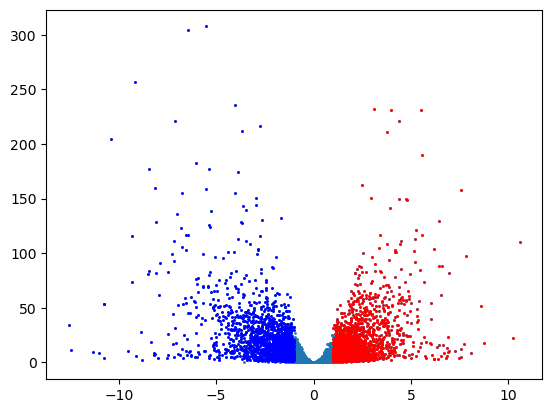

In [17]:
# define which parameters determine if a gene is significantly up or down
down = res[(res['log2FoldChange']<=-1)&(res['padj']<0.05)]
up = res[(res['log2FoldChange']>=1)&(res['padj']<0.05)]

# plot all the genes and label as non-significant
plt.scatter(x=res['log2FoldChange'],y=res['-log10 padj'],s=1,label="Not significant")
# colour downregulated genes in blue
plt.scatter(x=down['log2FoldChange'],y=down['-log10 padj'],s=1,label="Down-regulated",color="blue")
# colour upregulated genes in red
plt.scatter(x=up['log2FoldChange'],y=up['-log10 padj'],s=1,label="Up-regulated",color="red")

<div class="alert alert-block alert-warning">

Complete the code below to improve the volcano plot further by adding:

* axes labels
* lines at the threshold values
* legend

And save it as a png image so you can use it later

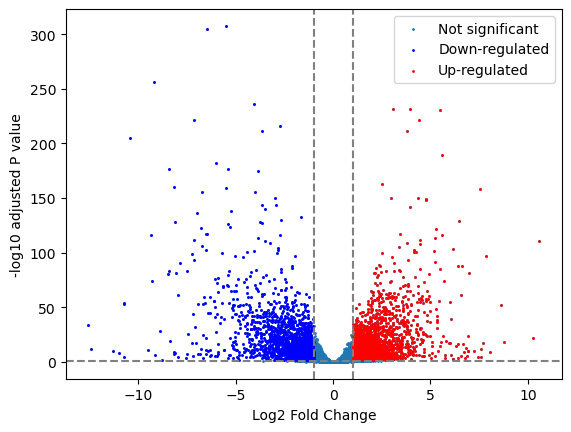

In [18]:
# define which parameters determine if a gene is significantly up or down
down = res[(res['log2FoldChange']<=-1)&(res['padj']<0.05)]
up = res[(res['log2FoldChange']>=1)&(res['padj']<0.05)]

# plot all the genes and label as non-significant
plt.scatter(x=res['log2FoldChange'],y=res['-log10 padj'],s=1,label="Not significant")
# colour downregulated genes in blue
plt.scatter(x=down['log2FoldChange'],y=down['-log10 padj'],s=1,label="Down-regulated",color="blue")
# colour upregulated genes in red
plt.scatter(x=up['log2FoldChange'],y=up['-log10 padj'],s=1,label="Up-regulated",color="red")

#Add axes labels
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10 adjusted P value")

# Add threshold lines
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")

#Add a legend
plt.legend()

#Save as png
plt.savefig('example_volcano.png')

<div class="alert alert-block alert-success">
<b>Learning outcomes</b>

You should now...

- Know how to interpret a volcano plot
- Know how to create a volcano plot to visualise your results

# Extension - Making an interactive volcano plot

To explore our data, it would be very convenient if we could hover over a dot and get the gene name. Making that sort of interactive plot is possible using the python library [plotly](https://plotly.com/python/).

In [20]:
# First, we install and import
! pip install plotly
import plotly.express as px

In [21]:
# Plotly requires a slightly different input than matplotlib. In our dataframe res, we need to create a new column with the gene names
res['gene']=res.index

/tmp/ipykernel_736/149330020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['gene']=res.index


In [22]:
# lets check that it worked
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10 padj,gene
gene,,,,,,,,
gene:Smp_000020,4894.181166,-0.220493,0.167242,-1.318412,1.873657e-01,2.438307e-01,0.612912,gene:Smp_000020
gene:Smp_000030,18780.967017,-0.640823,0.113347,-5.653632,1.570926e-08,4.778817e-08,7.320680,gene:Smp_000030
gene:Smp_000040,5663.668190,0.609067,0.135677,4.489107,7.152248e-06,1.703273e-05,4.768716,gene:Smp_000040
gene:Smp_000050,2824.491025,1.787653,0.281846,6.342663,2.258273e-10,8.001120e-10,9.096849,gene:Smp_000050
gene:Smp_000070,1794.569198,-0.465374,0.162826,-2.858100,4.261862e-03,7.376211e-03,2.132167,gene:Smp_000070
...,...,...,...,...,...,...,...,...
gene:Smp_900070,41334.608763,-2.999898,0.434565,-6.903219,5.083732e-12,2.035197e-11,10.691393,gene:Smp_900070
gene:Smp_900080,6394.476687,-3.246539,0.357623,-9.078104,1.104821e-19,7.298235e-19,18.136782,gene:Smp_900080
gene:Smp_900090,159155.732267,-4.304425,0.436382,-9.863897,5.968676e-23,4.747110e-22,21.323571,gene:Smp_900090


In [ ]:
# Now, we can use our new columns to make the volcano plot
fig = px.scatter(
    res,
    x='log2FoldChange',
    y='-log10 padj',
    hover_data=['log2FoldChange', 'padj','gene'],
    title='Volcano Plot cercarum_vs_24h_schistosomulum'
)

# Show the plot
fig.show()